In [5]:
import networkx as nx
import numpy as np
from ado import ApproximateDistanceOracle
import matplotlib.pyplot as plt

In [58]:
G = nx.fast_gnp_random_graph(200, 0.3)
ado_exact = ApproximateDistanceOracle(G, 1)
ado_approx_2 = ApproximateDistanceOracle(G, 2)
ado_approx_3 = ApproximateDistanceOracle(G, 3)
ado_approx_4 = ApproximateDistanceOracle(G, 4)

In [59]:
ado_exact.preprocess()
print("done - ado_exact")
ado_approx_2.preprocess()
print("done - ado_approx_2")
ado_approx_3.preprocess()
print("done - ado_approx_3")
ado_approx_4.preprocess()
print("done - ado_approx_4")

done - ado_exact
done - ado_approx_2
done - ado_approx_3
done - ado_approx_4


In [60]:
r1, r2, r3, r4, = [], [], [], []

for i in range(30):
    u = np.random.randint(0, len(G.nodes())-1)
    v = np.random.randint(0, len(G.nodes())-1)
    r1.append(ado_exact.query(u, v))
    r2.append(ado_approx_3.query(u, v))
    r3.append(ado_approx_4.query(u, v))
    r4.append(ado_approx_2.query(u, v))

In [61]:
e2 = [r2[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]
e3 = [r3[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]
e4 = [r4[i]/r1[i] for i in range(len(r1)) if r1[i] != 0]

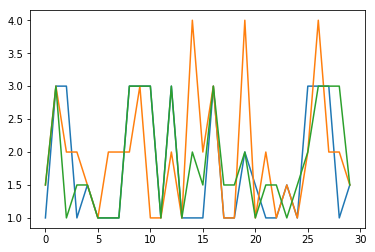

In [62]:
plt.figure(1)
plt.plot(e2)
plt.plot(e3)
plt.plot(e4)
plt.show()

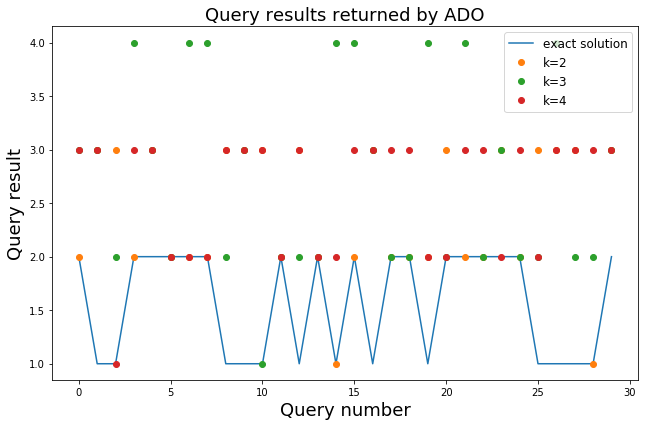

In [63]:
fig = plt.figure(1)
plt.plot(r1, label="exact solution")
plt.plot(r2, "o", label="k=2")
plt.plot(r3, "o", label="k=3")
plt.plot(r4, "o", label="k=4")
plt.legend( fontsize=12)
plt.xlabel("Query number", fontsize=18)
plt.ylabel("Query result",  fontsize=18)
plt.title("Query results returned by ADO",  fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()
fig.savefig("../figs/ADO_acc.pdf")